<a href="https://colab.research.google.com/github/haishesauke/Alfido-Tech/blob/main/titanicsurvive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [89]:
# Reading into the data
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#Data Cleaning and Preprocessing 🧹

In [90]:
# handling missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [91]:
# filling the null values in 'Age' and 'Fare'
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Fare'].fillna(df['Fare'].mean(), inplace = True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [92]:
# We will delete the cabin column because of large number of missing values
df.drop('Cabin', axis =1 , inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [93]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [94]:
# we will drop PassengerId , Name and Ticket because they does not have any effect on survival
df.drop(['Name', 'Ticket'], axis = 1, inplace = True )

In [95]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


In [96]:
# coverting Sex to numerical value through one-hot encoding
df = pd.get_dummies(df, columns = ['Sex'])

In [97]:
df.drop('Sex_female', axis = 1 , inplace = True)
df.rename(columns = {'Sex_male' : 'Sex'} , inplace = True )

In [98]:
df.head() # here in Sex column 1 represents Male while 0 represents Female

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,892,0,3,34.5,0,0,7.8292,Q,1
1,893,1,3,47.0,1,0,7.0000,S,0
2,894,0,2,62.0,0,0,9.6875,Q,1
3,895,0,3,27.0,0,0,8.6625,S,1
4,896,1,3,22.0,1,1,12.2875,S,0


In [99]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [100]:
# coverting values in 'Embarked' to numerical values through ordinal encoding
ordinalMapping = {'Q' : 1, 'S' : 2, 'C' : 3}
df['Embarked'] = df['Embarked'].map(ordinalMapping)


In [101]:
df.head(11)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,892,0,3,34.50000,0,0,7.8292,1,1
1,893,1,3,47.00000,1,0,7.0000,2,0
2,894,0,2,62.00000,0,0,9.6875,1,1
3,895,0,3,27.00000,0,0,8.6625,2,1
4,896,1,3,22.00000,1,1,12.2875,2,0
5,897,0,3,14.00000,0,0,9.2250,2,1
6,898,1,3,30.00000,0,0,7.6292,1,0
7,899,0,2,26.00000,1,1,29.0000,2,1
8,900,1,3,18.00000,0,0,7.2292,3,0
9,901,0,3,21.00000,2,0,24.1500,2,1


In [102]:
df.describe() # statistical analysis of various columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188,2.133971,0.636364
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500,0.580452,0.481622
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800,2.000000,0.000000
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200,2.000000,1.000000
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000,2.000000,1.000000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,3.000000,1.000000


#Visualization 📉

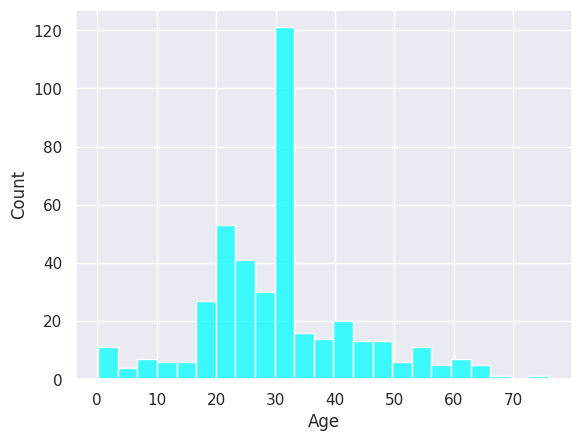

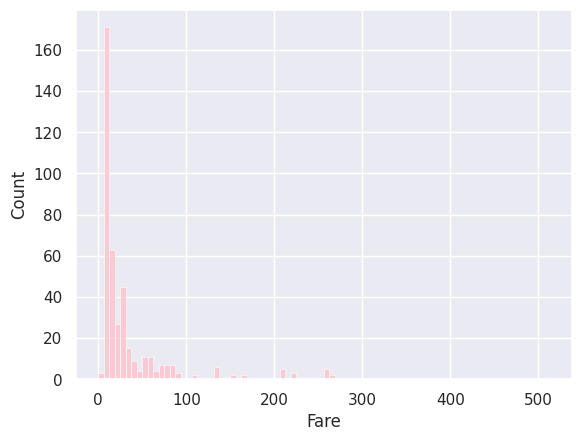

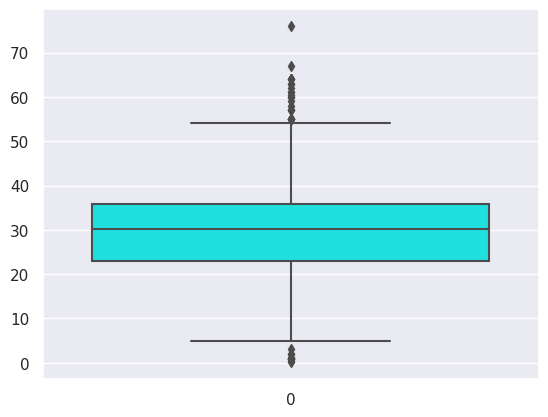

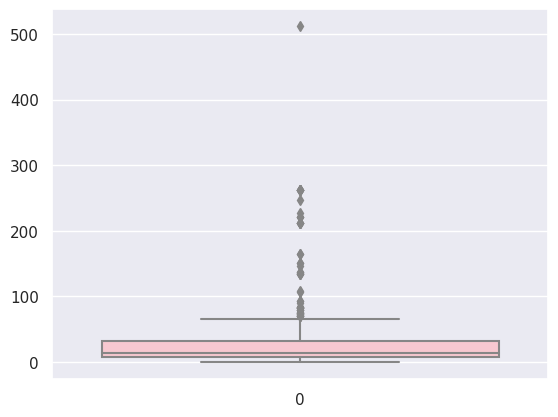

In [103]:
sns.histplot(df['Age'], color = 'aqua')   # distribution of "Age" in data using a histplot
plt.show()
sns.histplot(df['Fare'], color = 'pink')  # distribution of "Fare" in data using a histplot
plt.show()
sns.boxplot(df['Age'], color = 'aqua')    # distribution of "Age" in data using a boxplot
plt.show()
sns.boxplot(df['Fare'], color = 'pink')   # distribution of "Fare" in data using a boxplot
plt.show()

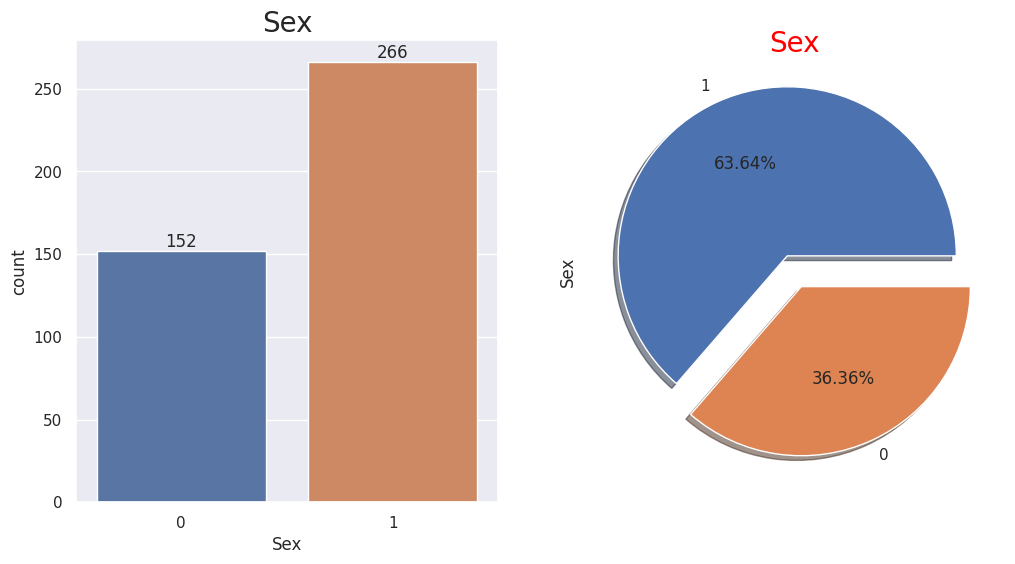

In [104]:
# distribution of gender in our data
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Sex', data=df)
ax.bar_label(ax.containers[0])
plt.title("Sex", fontsize=20)
ax =plt.subplot(1,2,2)
ax=df['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Sex", fontsize = 20,color='Red');

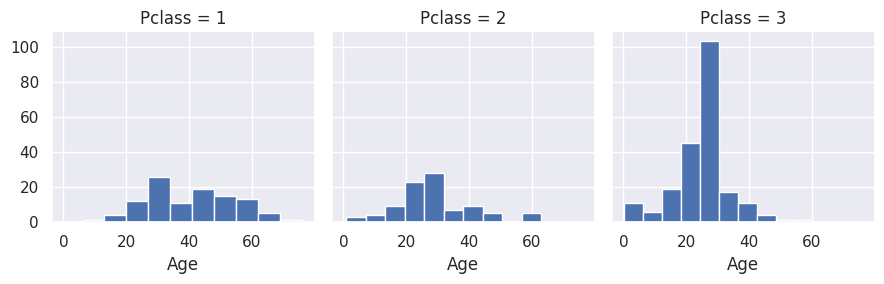

In [105]:
#age vs pclass distribution
f = sns.FacetGrid(df, col = 'Pclass')
f = f.map(plt.hist, 'Age')


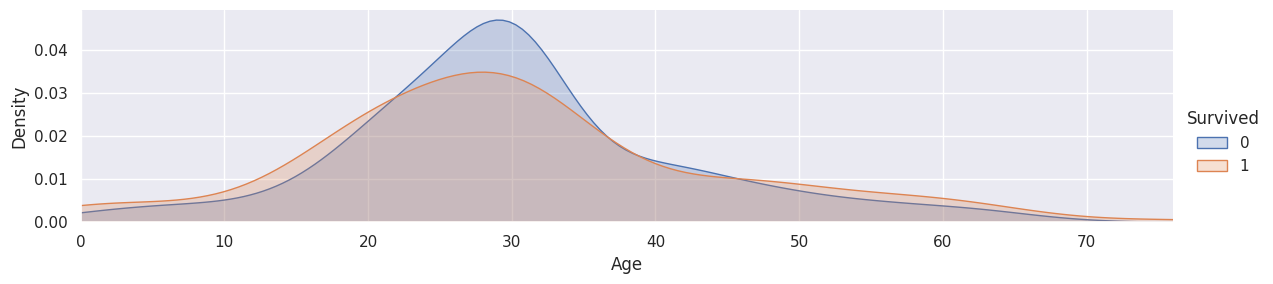

In [106]:
# visualization of "Age" vs "Survive"
fig = sns.FacetGrid(df, hue="Survived", aspect=4)
fig.map(sns.kdeplot, 'Age', fill=True)
oldest = df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show()


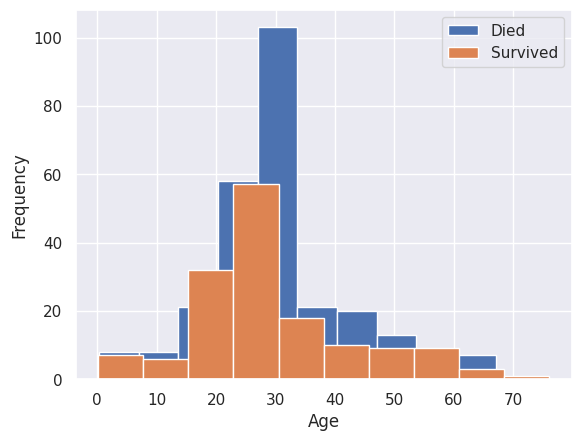

In [107]:
fig = df.groupby('Survived')['Age'].plot.hist(histtype = 'bar')
plt.xlabel('Age')
plt.legend(("Died", "Survived"))
plt.show()

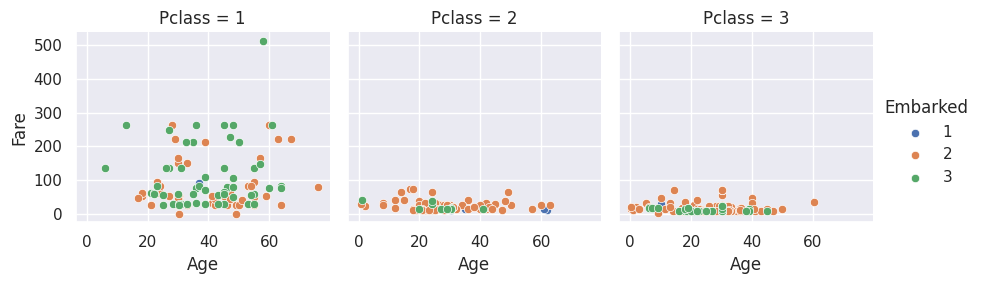

In [108]:
g = sns.FacetGrid(df, col="Pclass", hue="Embarked")
g.map_dataframe(sns.scatterplot, x="Age", y="Fare")
g.add_legend()
plt.show()

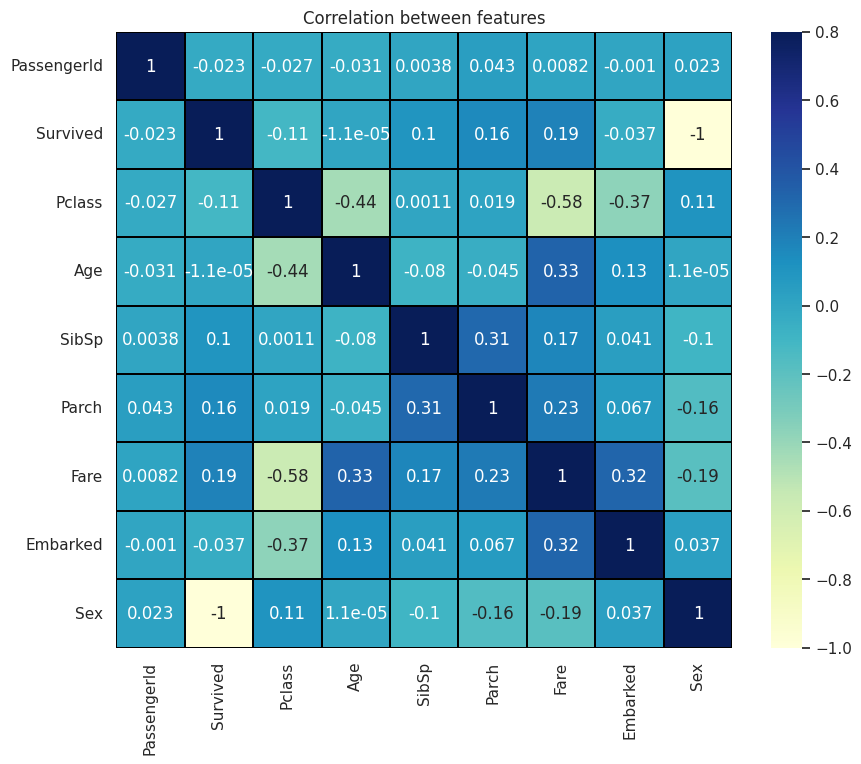

In [109]:
# Correlation between features
corr=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

In [110]:
high_correlation = df.corr()
high_correlation_features = high_correlation.index[abs(high_correlation["Fare"])>=0.25]
high_correlation_features

Index(['Pclass', 'Age', 'Fare', 'Embarked'], dtype='object')

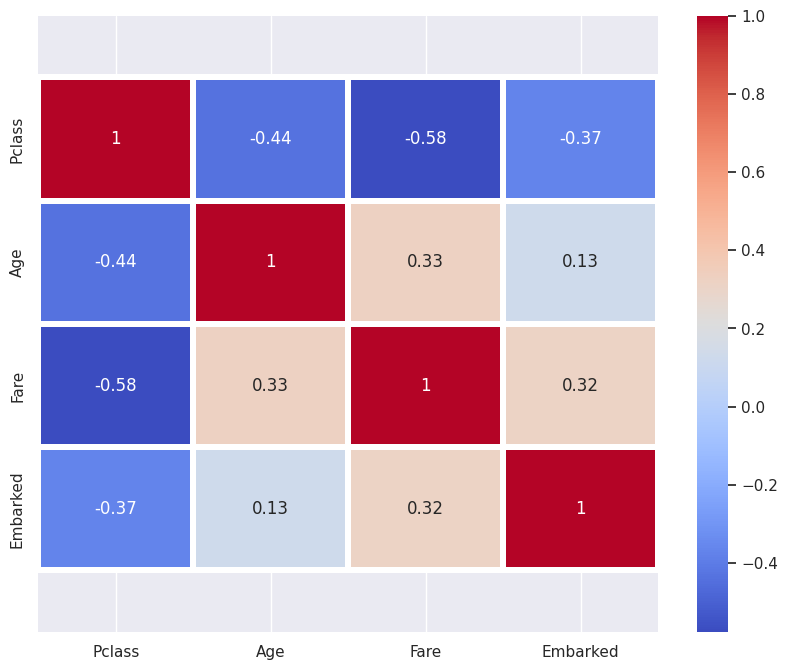

In [111]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df[high_correlation_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)
# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

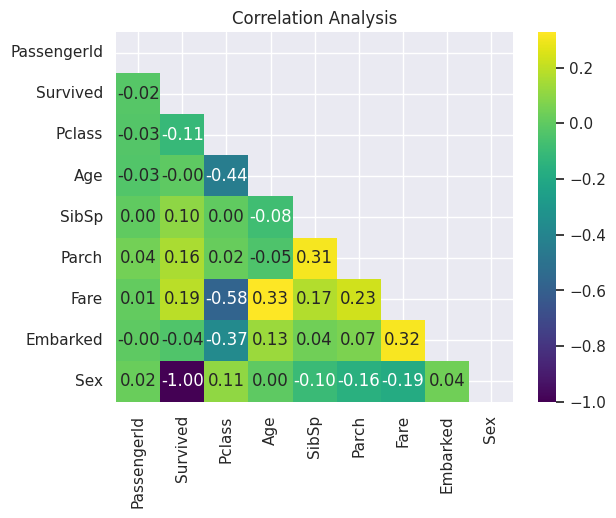

In [112]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
plt.figure(dpi = 100)
plt.title('Correlation Analysis')
sns.heatmap(corr,mask=mask,annot=True,lw=0,linecolor='white',cmap='viridis',fmt = "0.2f")
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

In [113]:
df.corr(method = 'pearson')['Age'].abs()

PassengerId    0.030874
Survived       0.000011
Pclass         0.440782
Age            1.000000
SibSp          0.079535
Parch          0.045073
Fare           0.326800
Embarked       0.126594
Sex            0.000011
Name: Age, dtype: float64

We see that the strongest correlation of the variable age is with the variable Pclass (passenger class).

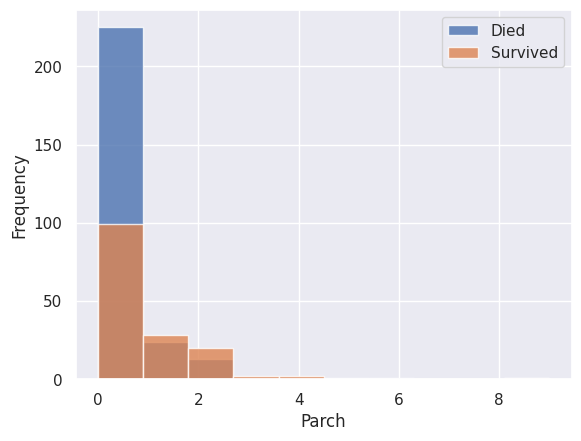

In [114]:
plt.figure()
fig = df.groupby('Survived')['Parch'].plot.hist(histtype= 'bar',alpha = 0.8)
plt.legend(('Died','Survived'),)
plt.xlabel('Parch')
plt.show()

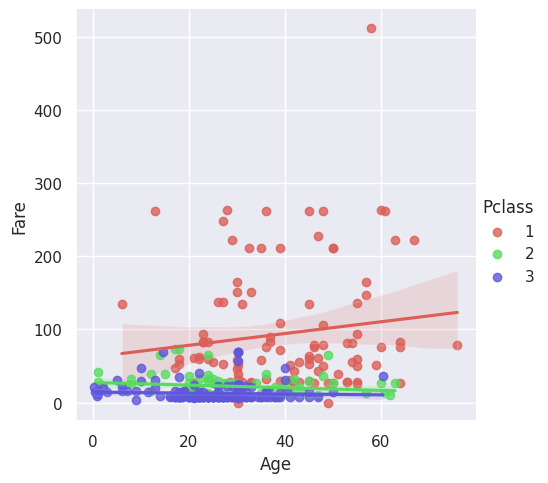

In [115]:
g= sns.lmplot(x="Age", y="Fare", hue="Pclass", data=df, palette="hls")

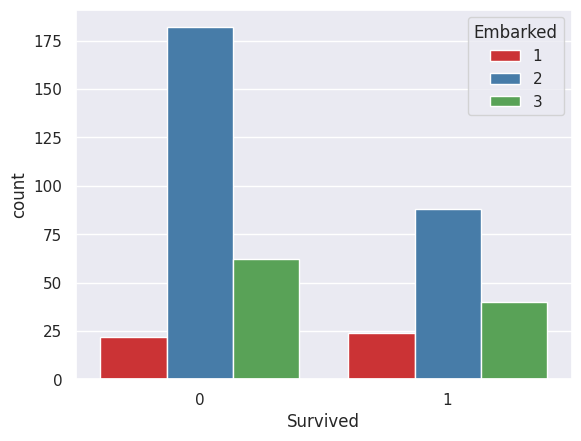

In [116]:
sns.set(style="darkgrid")
sns.countplot( x='Survived', data=df, hue="Embarked", palette="Set1");

In [117]:
y = df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df[features])
X_test = pd.get_dummies(df[features])

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
model.fit(X, y)
predictions = model.predict(X_test)


In [118]:
# Define features and target variable
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df[features])
y = df["Survived"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Create and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [119]:
# testing our model on random data
new_passenger_data = pd.DataFrame({
    "Pclass": [3],         # Passenger Class
    "Sex": [0],            # Sex (0 for female, 1 for male)
    "SibSp": [0],          # SibSp
    "Parch": [0]           # Parch
})


predictions = model.predict(new_passenger_data)

# The 'predictions' variable now contains the predicted survival status for the new passengers
print(predictions)


[1]
